In [1]:
# All imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

In [13]:
import warnings
warnings.filterwarnings('ignore')
#Ignoring all warnings from sklearn modules due to deprecated functions

In [3]:
df_train_data.info()
df_train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       14500 non-null  int64
 1   1       14500 non-null  int64
 2   2       14500 non-null  int64
 3   3       14500 non-null  int64
 4   4       14500 non-null  int64
 5   5       14500 non-null  int64
 6   6       14500 non-null  int64
 7   7       14500 non-null  int64
 8   8       14500 non-null  int64
 9   9       14500 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [4]:
df_train_data[9] = np.where(df_train_data[9] == 1,1,0)

X = df_train_data.drop([9], axis = 1)

Y = df_train_data[9]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 10875 training samples and 3625 test samples


In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8
9367,43,0,80,-1,44,27,37,36,0
13268,56,0,95,0,44,24,40,51,12
12651,76,0,81,-6,-42,-11,5,125,120
14,46,-5,84,0,46,0,38,37,0
1925,56,5,95,0,44,-5,39,51,12


In [6]:
lr = LogisticRegression(penalty='none', max_iter=1000)
lr.fit(X_train, Y_train)
lr.coef_

array([[ 2.23269242e-01,  4.51797453e-03, -2.64324784e-01,
        -8.48224164e-04, -4.81066471e-01, -3.09672182e-04,
         1.07294312e+00, -8.65734161e-01,  1.75913965e-01]])

In [7]:
lr_score = lr.score(X_test, Y_test)
print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.968


In [8]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)
round(dummy.score(X_test, Y_test), 3)

0.785

In [9]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(Y_test,predictions)
print(confusion)

[[ 706   74]
 [  42 2803]]


In [10]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

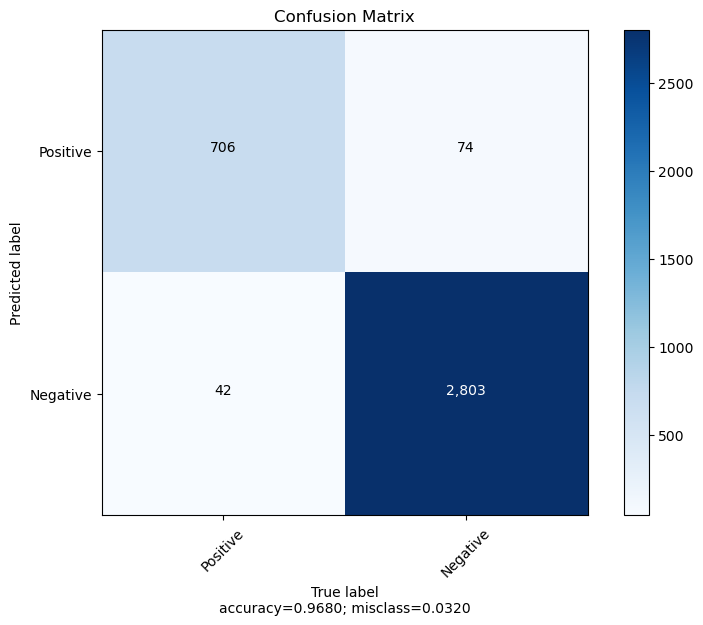

In [11]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [12]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
fbeta_precision = fbeta_score(Y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(Y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 0.97
Recall score: 0.99
F1 score: 0.98
Fbeta score favoring precision: 0.98
FBeta score favoring recall: 0.98


In [14]:
report = classification_report(Y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92       780
    Positive       0.97      0.99      0.98      2845

    accuracy                           0.97      3625
   macro avg       0.96      0.95      0.95      3625
weighted avg       0.97      0.97      0.97      3625



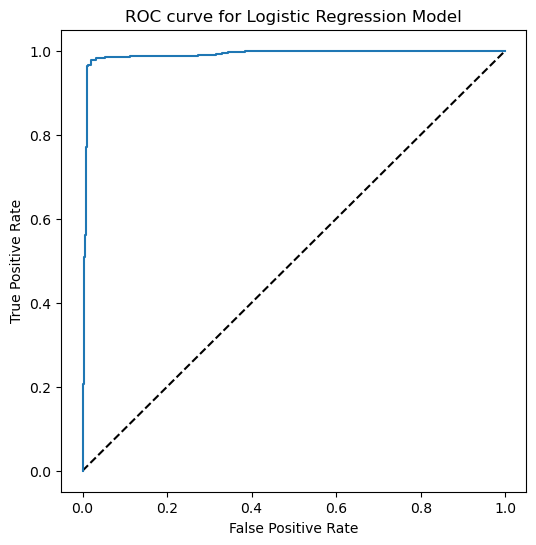

Area under the ROC curve: 0.990


In [16]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(Y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

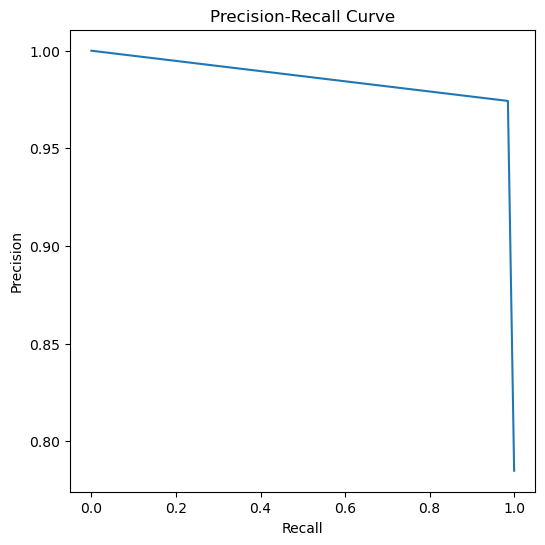

In [17]:
pres, rec, thresholds = precision_recall_curve(Y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

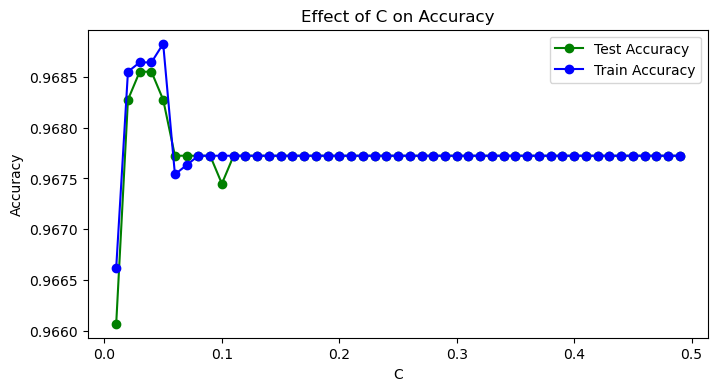

In [20]:
c_vals = np.arange(0.01, 0.5, 0.01)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, Y_train)
  test_accuracy.append(lr.score(X_test, Y_test))
  train_accuracy.append(lr.score(X_train, Y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [21]:
best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.03
Best test accuracy: 0.969


In [22]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.97149425 0.96781609 0.96367816 0.96321839 0.96643678]
Mean cross validation score: 0.967
